In [2]:
!pip install --user virtualenv

tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
tensorboard 1.8.0 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.


In [3]:
!virtualenv lmfit_7 -p /usr/bin/python3.5
!virtualenv lmfit_9 -p /usr/bin/python3.5

/bin/sh: virtualenv: command not found
/bin/sh: virtualenv: command not found


# 0.9.7

In [6]:
v7 = %run lmfit_7/bin/activate_this.py
#!pip3 install lmfit==0.9.7

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lmfit
lmfit.__version__

'0.9.9'

In [8]:
def fct_exponentiel (x, bino, start_anti, v_anti, latence, tau, maxi) :
    v_anti = v_anti/1000 # pour passer de sec à ms
    time = np.arange(len(x))
    vitesse = []

    for t in range(len(time)):
        if start_anti >= latence :
            if time[t] < latence :
                vitesse.append(0)
            else :
                vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence))))
        else :
            if time[t] < start_anti :
                vitesse.append(0)
            else :
                if time[t] < latence :
                    vitesse.append((time[t]-start_anti)*v_anti)
                    x = (time[t]-start_anti)*v_anti
                else :
                    vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence)))+x)

    return vitesse

In [9]:
from lmfit import  Model, Parameters

x = np.arange(0,1500,1)
bino, start_anti, v_anti, latence, tau, maxi = 1, 500, 3, 1000, 60, 2

np.random.seed(7)

a = fct_exponentiel(x, bino, start_anti, v_anti, latence, tau, maxi)+np.random.rand(len(x))*0.5
a = a-np.random.rand(len(x))*0.5

a[770:820] =  np.arange(0,50,1)*np.nan

model = Model(fct_exponentiel)
params = Parameters()

params.add('tau', value=tau-60, min=13., max=80.)
params.add('maxi', value=maxi-1, min=1., max=5.)
params.add('latence', value=latence+150, min=600, max=len(x))
params.add('start_anti', value=start_anti-500, min=0, max=600)
params.add('v_anti', value=v_anti-3, min=-40., max=40.)
params.add('bino', value=bino, vary=False)

result_deg = model.fit(a, params, x=x, fit_kws={'nan_policy': 'omit'})

plt.plot(a, c='k', alpha=0.6)
plt.plot(result_deg.init_fit, c='k')
plt.plot(result_deg.best_fit, c='r')

print(result_deg.values)

TypeError: type object got multiple values for keyword argument 'nan_policy'

In [5]:
quit(v7)

# 0.9.9

In [1]:
v9 = %run lmfit_9/bin/activate_this.py
#!pip3 install lmfit==0.9.9

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lmfit
lmfit.__version__

'0.9.9'

In [11]:
def fct_exponentiel (x, bino, start_anti, v_anti, latence, tau, maxi) :
    v_anti = v_anti/1000 # pour passer de sec à ms
    time = np.arange(len(x))
    vitesse = []

    for t in range(len(time)):
        if start_anti >= latence :
            if time[t] < latence :
                vitesse.append(0)
            else :
                vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence))))
        else :
            if time[t] < start_anti :
                vitesse.append(0)
            else :
                if time[t] < latence :
                    vitesse.append((time[t]-start_anti)*v_anti)
                    x = (time[t]-start_anti)*v_anti
                else :
                    vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latence)))+x)

    return vitesse

{'tau': 40.90276236773941, 'maxi': 1.6025157874805798, 'latence': 1112.0412899824005, 'start_anti': 5.388023360808347e-09, 'v_anti': 1.7316495255626734, 'bino': 1}


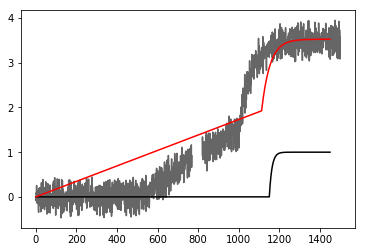

In [12]:
from lmfit import  Model, Parameters

x = np.arange(0,1500,1)
bino, start_anti, v_anti, latence, tau, maxi = 1, 500, 3, 1000, 60, 2

np.random.seed(7)

a = fct_exponentiel(x, bino, start_anti, v_anti, latence, tau, maxi)+np.random.rand(len(x))*0.5
a = a-np.random.rand(len(x))*0.5

a[770:820] =  np.arange(0,50,1)*np.nan

model = Model(fct_exponentiel)
params = Parameters()

params.add('tau', value=tau-60, min=13., max=80.)
params.add('maxi', value=maxi-1, min=1., max=5.)
params.add('latence', value=latence+150, min=600, max=len(x))
params.add('start_anti', value=start_anti-500, min=0, max=600)
params.add('v_anti', value=v_anti-3, min=-40., max=40.)
params.add('bino', value=bino, vary=False)

result_deg = model.fit(a, params, x=x, nan_policy='omit')

plt.plot(a, c='k', alpha=0.6)
plt.plot(result_deg.init_fit, c='k')
plt.plot(result_deg.best_fit, c='r')

print(result_deg.values)

In [13]:
quit(v9)

NameError: name 'v9' is not defined